<a href="https://colab.research.google.com/github/kavitapatil27/Machine-Learning-Projects/blob/main/Decision_Tree_Classifer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#*AUTHOR-KAVITA PATIL*#

##**TASK-5 : Prediction using Decision Tree Algorithm**##

##Problem Statement :
Create a Decision tree classifier and visualize the data graphically. Also, predict the right class for any new data introduced to the classifier.

In [2]:
#Upload the file

from google.colab import files
upload=files.upload()

Saving Iris.csv to Iris.csv


In [1]:
#Import required libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [55]:
df=pd.read_csv("Iris.csv")

In [61]:
df.tail(100)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
#Check the properties of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
#Check for any null values

df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
#Describe the data

df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
#Determine the count of species in the dataset
df.Species.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

The above line of code shows that the dataset is balanced and no species is dominating the dataset

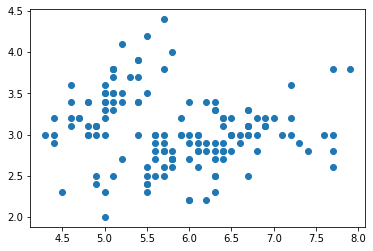

In [9]:
#Visualizing the dataset features to find pattern to solve our task

plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'])
plt.show()

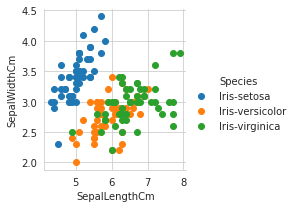

<Figure size 864x648 with 0 Axes>

In [11]:
#Visualization of two features based on target variable.

sns.set_style('whitegrid')
sns.FacetGrid(df, hue = 'Species') \
   .map(plt.scatter, 'SepalLengthCm','SepalWidthCm') \
   .add_legend()
plt.figure(figsize=(12,9))
plt.show()

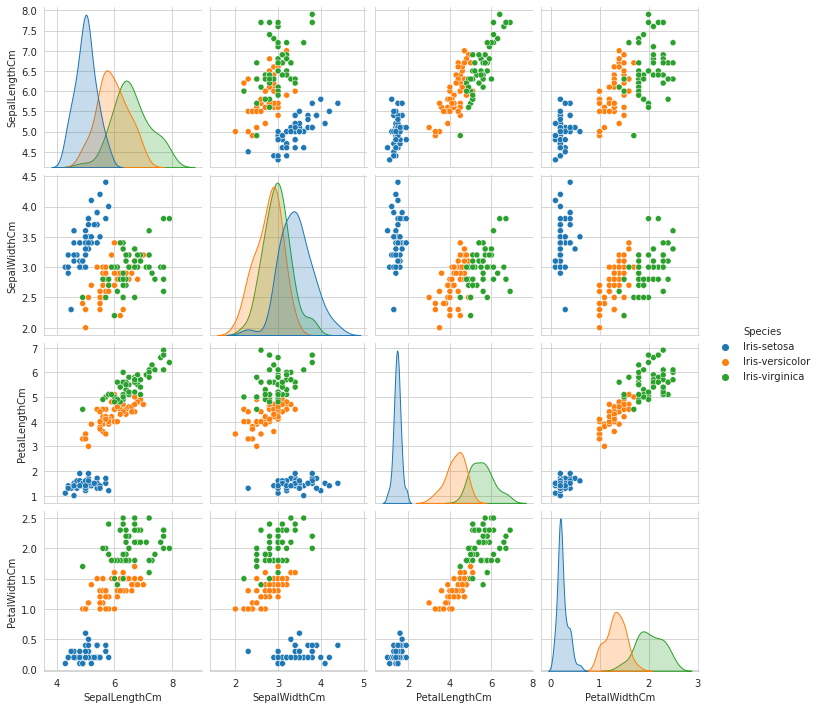

In [12]:
#Visualization of all features to determine the relationship between them

sns.pairplot(df.drop(['Id'],axis=1), hue='Species')
plt.show()

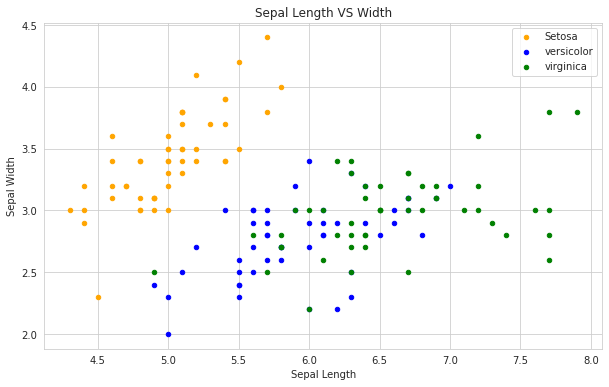

In [13]:
fig = df[df.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
df[df.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
df[df.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

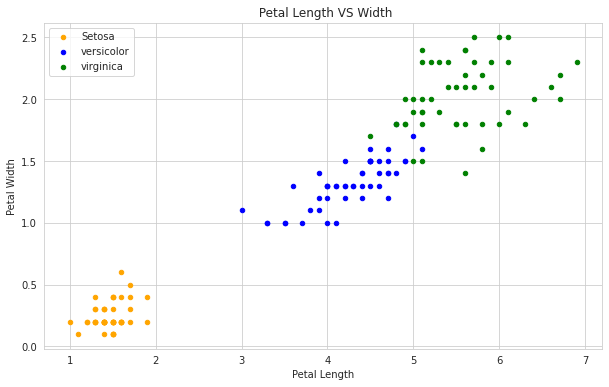

In [17]:
fig = df[df.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
df[df.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
df[df.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

In [14]:
#Droping Id column as it is of no use in classifing the class labels..

df.drop(['Id'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

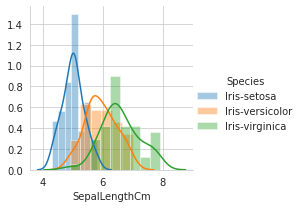

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

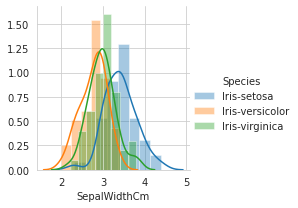

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

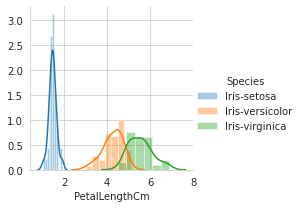

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

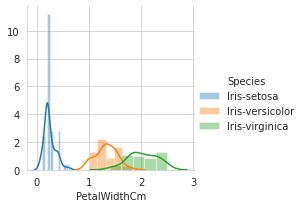

In [15]:
#exploring distribution plot for all features

for i in df.columns:
    if i == 'Species':
        continue
    sns.set_style('whitegrid')
    sns.FacetGrid(df,hue='Species')\
    .map(sns.distplot,i)\
    .add_legend()
    plt.show()

BUILD CLASSIFICATION MODEL

In [20]:
#import required libraries

import graphviz
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score

[Text(251.10000000000002, 454.2942857142857, 'X[2] <= 2.6\ngini = 0.665\nsamples = 94\nvalue = [30, 30, 34]'),
 Text(167.4, 384.40285714285716, 'gini = 0.0\nsamples = 30\nvalue = [30, 0, 0]'),
 Text(334.8, 384.40285714285716, 'X[3] <= 1.55\ngini = 0.498\nsamples = 64\nvalue = [0, 30, 34]'),
 Text(167.4, 314.51142857142855, 'X[2] <= 5.0\ngini = 0.124\nsamples = 30\nvalue = [0, 28, 2]'),
 Text(83.7, 244.62, 'gini = 0.0\nsamples = 28\nvalue = [0, 28, 0]'),
 Text(251.10000000000002, 244.62, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(502.20000000000005, 314.51142857142855, 'X[2] <= 5.05\ngini = 0.111\nsamples = 34\nvalue = [0, 2, 32]'),
 Text(418.5, 244.62, 'X[1] <= 2.9\ngini = 0.375\nsamples = 8\nvalue = [0, 2, 6]'),
 Text(334.8, 174.7285714285714, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5]'),
 Text(502.20000000000005, 174.7285714285714, 'X[2] <= 4.9\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(418.5, 104.83714285714285, 'X[1] <= 3.1\ngini = 0.5\nsamples = 2\nvalue = [

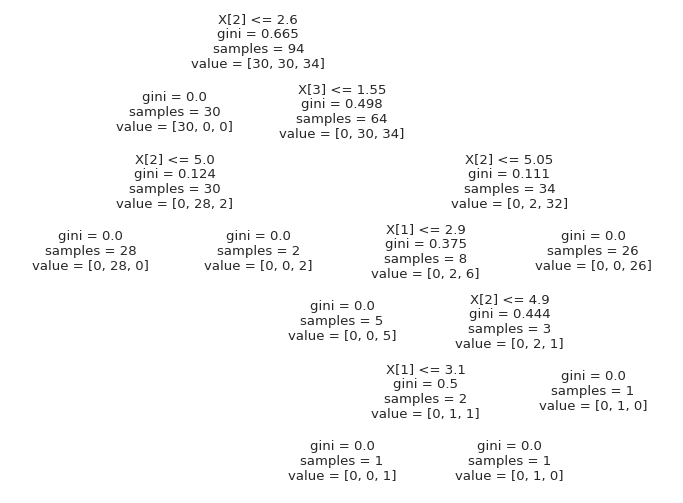

In [23]:
X = df[['SepalLengthCm', 'SepalWidthCm','PetalLengthCm', 'PetalWidthCm']]
y = df['Species']


#Split data into Actual Train and Actual Test

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.30, random_state=42)

#Split data into Validation Train and Validation Test
Xt, Xcv, Yt, Ycv = train_test_split(Xtrain, Ytrain, test_size=0.10, random_state=42)




'''Create a DecisionTreeClassifier and train the dataset using training values'''
clf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
clf.fit(Xt, Yt)

#Visualized the Tree which is formed on train dataset
plt.figure(figsize=(12,9))
tree.plot_tree(clf)

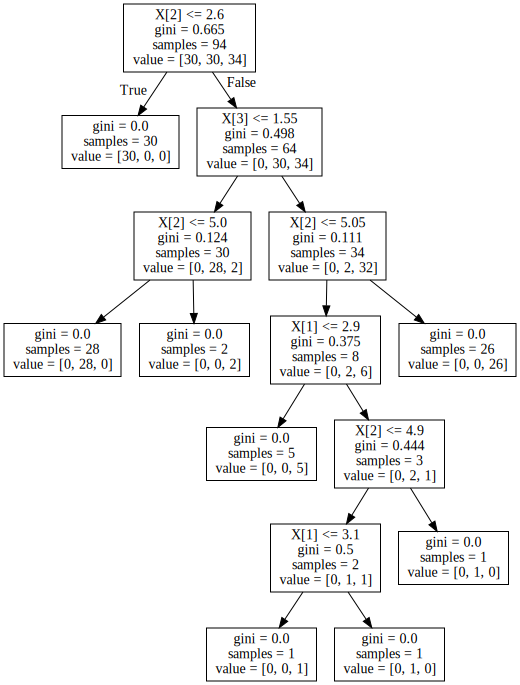

In [25]:
#Visualizing Decision Tree using graphviz library

dot_data = tree.export_graphviz(clf, out_file=None)

graph = graphviz.Source(dot_data)
graph

In [26]:
#Validation using cross validation method to determine the accuracy and performance score

print('Accuracy score is:',cross_val_score(clf, Xt, Yt, cv=3, scoring='accuracy').mean())

Accuracy score is: 0.9361559139784946


In [29]:
#Checking validation test data on our trained model and getting performance metrices

from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

Y_hat = clf.predict(Xcv)


print('Accuracy score for validation test data is:',accuracy_score(Ycv, Y_hat))
multilabel_confusion_matrix(Ycv , Y_hat)

Accuracy score for validation test data is: 0.8181818181818182


array([[[10,  0],
        [ 0,  1]],

       [[ 3,  1],
        [ 1,  6]],

       [[ 7,  1],
        [ 1,  2]]])

In [28]:
#Checking our model performance on actual unseen test data.. 
YT_hat = clf.predict(Xtest)
YT_hat

print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(Ytest, YT_hat)*100,'%')
multilabel_confusion_matrix(Ytest , YT_hat)

Model Accuracy Score on totally unseen data(Xtest) is: 100.0 %


array([[[26,  0],
        [ 0, 19]],

       [[32,  0],
        [ 0, 13]],

       [[32,  0],
        [ 0, 13]]])

[Text(206.03076923076924, 454.2942857142857, 'X[3] <= 0.8\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(154.52307692307693, 384.40285714285716, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(257.53846153846155, 384.40285714285716, 'X[2] <= 4.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(103.01538461538462, 314.51142857142855, 'X[3] <= 1.6\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(51.50769230769231, 244.62, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(154.52307692307693, 244.62, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(412.0615384615385, 314.51142857142855, 'X[3] <= 1.75\ngini = 0.214\nsamples = 41\nvalue = [0, 5, 36]'),
 Text(257.53846153846155, 244.62, 'X[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(206.03076923076924, 174.7285714285714, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(309.04615384615386, 174.7285714285714, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text

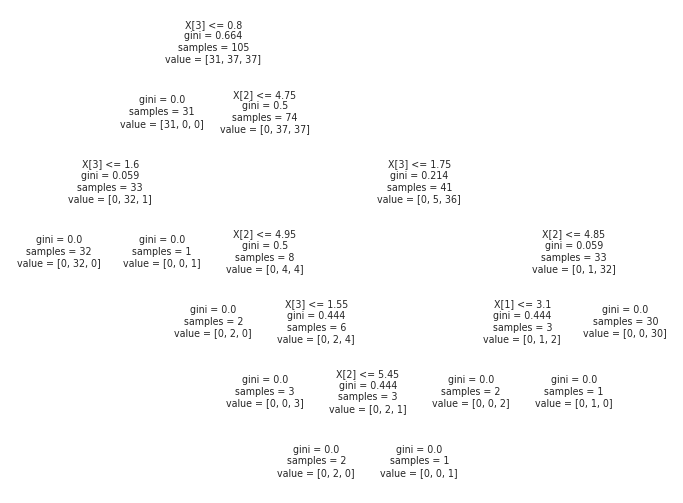

In [31]:
'''Training model on Actual train data... '''
Fclf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
Fclf.fit(Xtrain, Ytrain)

#Visualize tree structure.
plt.figure(figsize=(12,9))
tree.plot_tree(Fclf)

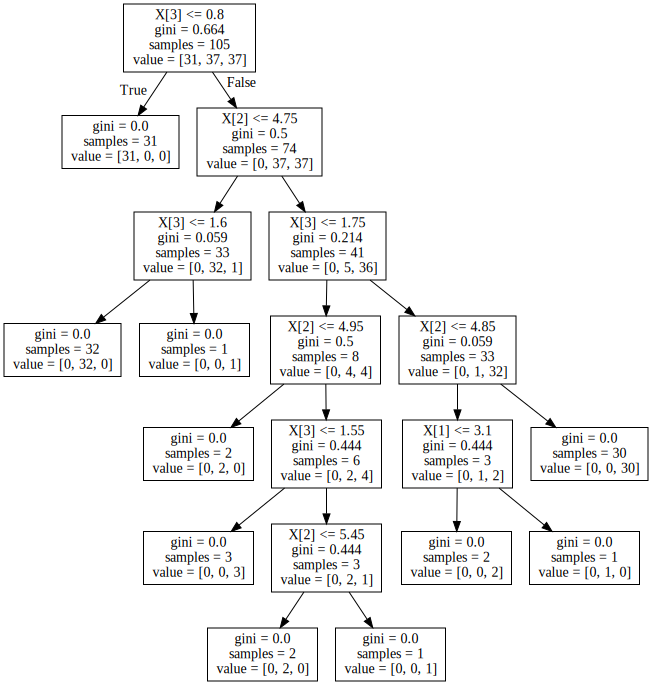

In [32]:
#Final Decision tree build for deploying in real world cases

dot_data = tree.export_graphviz(Fclf, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [33]:
#CHeck performance

YT_Fhat = Fclf.predict(Xtest)
YT_Fhat

print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(Ytest, YT_Fhat)*100,'%')
multilabel_confusion_matrix(Ytest , YT_Fhat)

Model Accuracy Score on totally unseen data(Xtest) is: 100.0 %


array([[[26,  0],
        [ 0, 19]],

       [[32,  0],
        [ 0, 13]],

       [[32,  0],
        [ 0, 13]]])

In [63]:
#Testing for New points not in Dataset

Test_point = [[4.0,3.0,5.5,2.5],
             [6.5,2.8,4.6,1.5],
             [5.1,-2.5,3.0,-1.1],
             [5.1,3.3,-1.7,0.5],
             [6.0,2.7,5.1,1.6],
             [7.0,2.2,5.0,-1.5]]

print(Fclf.predict(Test_point))

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa']


From the code bove we determine that for any new data points added pertaining to dataset, right species can be predicted